# Primer intento: Minimize (esto es local NO SIRVE)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import *
from scipy.optimize import fsolve
import math
from matplotlib.colors import LogNorm
from numpy import genfromtxt
import pandas as pd

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 15, "font.family": "serif"})

In [2]:
def f(x):
    return np.sin(x)
minimize(f, 0.1)

      fun: -0.9999999999999964
 hess_inv: array([[1.00005774]])
      jac: array([9.68575478e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.57079624])

In [6]:
def e0phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 + lamb2)

def e1phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 - lamb2)

def e2phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 + lamb3)

def e3phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 - lamb3)


e0t = 1/2*3
e1t = 1/2*1
e2t = 1/2*(-1)
e3t = 1/2*(-3)

e0AdS = complex(0, e0t)
e1AdS = complex(0, e1t)
e2AdS = complex(0, e2t)
e3AdS = complex(0, e3t)


In [101]:
def Qn(n, lamb1, lamb2, lamb3):
    return 1/n*(e0phi(lamb1, lamb2, lamb3)**n + e1phi(lamb1, lamb2, lamb3)**n + e2phi(lamb1, lamb2, lamb3)**n + e3phi(lamb1, lamb2, lamb3)**n)

def QnAdS(n):
    return 1/n*(e0AdS**n + e1AdS**n + e2AdS**n + e3AdS**n)

def S(lamb1, lamb2, lamb3):
    return e0phi(lamb1, lamb2, lamb3)*e0t + e1phi(lamb1, lamb2, lamb3)*e1t + e2phi(lamb1, lamb2, lamb3)*e2t + e3phi(lamb1, lamb2, lamb3)*e3t

def Gamma(lambs, mu3, mu4):
    lamb1, lamb2, lamb3 = lambs
    return np.real(5*(Qn(2, lamb1, lamb2, lamb3) - QnAdS(2)) + mu3*(Qn(3, lamb1, lamb2, lamb3) - QnAdS(3)) + mu4*(Qn(4, lamb1, lamb2, lamb3) - QnAdS(4)))

In [104]:
def dQdlambda(lambs):
    lamb1, lamb2, lamb3 = lambs
    return 1/32*lamb2*lamb3*(4*lamb1 + lamb2 + lamb3)*(4*lamb1 - lamb2 + lamb3)*(4*lamb1 + lamb2 - lamb3)*(4*lamb1 - lamb2 - lamb3)

def const_real(lambs):
    lamb1, lamb2, lamb3 = lambs
    return np.sum(np.iscomplex(lamb1)) + np.sum(np.iscomplex(lamb2)) + np.sum(np.iscomplex(lamb3))


bnds = ((0, None), (0, None), (0, None))
cons = {'type':'ineq', 'fun':dQdlambda}

mu30 = 0.1
mu3f = 4*np.pi
mu40 = 0.1
mu4f = 2*np.pi**2/5
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)


<ipython-input-104-24ff21bb8e81>:32: RuntimeWarning: divide by zero encountered in log
  Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)


In [100]:
Gamma((1,1,1),1,1)

(25+0j)

In [20]:
def D1Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4

def D2Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -(1/2) + 5*lamb2/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4

def D3Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -(1/2) + 5*lamb3/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4

In [91]:
def equations(x, mu3, mu4):
    lamb1, lamb2, lamb3 = x
    return (D1Gamma(lamb1, lamb2, lamb3, mu3, mu4), D2Gamma(lamb1, lamb2, lamb3, mu3, mu4), D3Gamma(lamb1, lamb2, lamb3, mu3, mu4))






#lamb1, lamb2, lamb3 =  fsolve(equations, (1, 1, 1), args=(1, 1))

In [81]:
Q2_array[9, 0]=1
Q2_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [65]:
len(mu3list)

50

In [92]:



for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        lamb1, lamb2, lamb3 =  fsolve(equations, (1, 1, 1), args=(mu3list[x], mu4list[y]), xtol=1.49012e-10)
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)
        #print(Q2_array)

/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [63]:
Q2_array

array([[-2.30428603, -2.31517685, -2.3212319 , ..., -2.50857763,
        -2.5109971 , -2.51165356],
       [-2.24966072, -2.25342294, -2.26656604, ..., -2.48060537,
        -2.48339587, -2.48428284],
       [-2.18588691, -2.19515184, -2.20758713, ..., -2.45224873,
        -2.45576685, -2.45830642],
       ...,
       [-2.41193555, -2.41001186, -2.40807832, ..., -2.30862183,
        -2.306071  , -2.30350176],
       [-2.41291111, -2.41099545, -2.40907005, ..., -2.31014241,
        -2.30760849, -2.3050565 ],
       [-2.41337016, -2.41145828, -2.4095367 , ..., -2.31085695,
        -2.30833096, -2.30578703]])

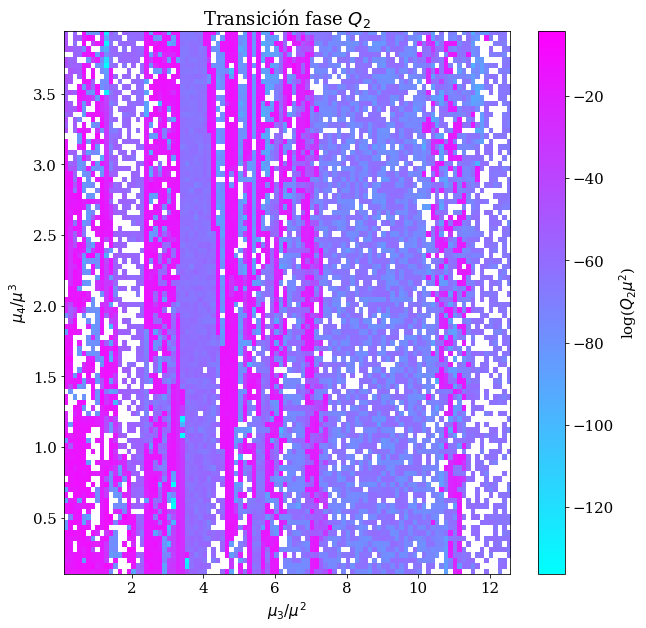

In [105]:
fig, ax = plt.subplots(figsize=(10,10))

c = ax.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='lower', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax.set_title("Transición fase $Q_2$")
ax.set_xlabel("$\mu_3/\mu^2$")
ax.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

In [31]:
res = minimize(Gamma, args=(6, 9))
res.x

TypeError: minimize() missing 1 required positional argument: 'x0'

In [26]:
Gamma((0,0,0),1,1)

(9.9375+0j)

In [16]:
f = lambdify((x,z), yprime, 'numpy')
f(4,2)

10

In [ ]:
-4 + 20*lamb1 + 1/2 (lamb2**2 - lamb3**2)*mu3 + 1/32 (128*lamb1^3 + 48*lamb1 (lamb2**2 + lamb3**2))*mu4

# Segundo intento

In [5]:
params = (2, 3, 7, 8, 9, 10, 44, -1, 2, 26, 1, -2, 0.5)
def f1(z, *params):
    x, y = z
    a, b, c, d, e, f, g, h, i, j, k, l, scale = params
    return (a * x**2 + b * x * y + c * y**2 + d*x + e*y + f)

def f2(z, *params):
    x, y = z
    a, b, c, d, e, f, g, h, i, j, k, l, scale = params
    return (-g*np.exp(-((x-h)**2 + (y-i)**2) / scale))

def f3(z, *params):
    x, y = z
    a, b, c, d, e, f, g, h, i, j, k, l, scale = params
    return (-j*np.exp(-((x-k)**2 + (y-l)**2) / scale))

def f(z, *params):
    return f1(z, *params) + f2(z, *params) + f3(z, *params)

In [ ]:
def f(z, list):
    x, y, r = z
    a = list
    return x^2+y^3+a*r^4

In [7]:
import numpy as np
rranges = (slice(-4, 4, 0.25), slice(-4, 4, 0.25))
from scipy import optimize
resbrute = optimize.brute(f, rranges, args=params, full_output=True,
                          finish=optimize.fmin)
resbrute  # global minimum

(array([-1.05665192,  1.80834843]),
 -3.4085818767996527,
 array([[[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
         [-3.75, -3.75, -3.75, ..., -3.75, -3.75, -3.75],
         [-3.5 , -3.5 , -3.5 , ..., -3.5 , -3.5 , -3.5 ],
         ...,
         [ 3.25,  3.25,  3.25, ...,  3.25,  3.25,  3.25],
         [ 3.5 ,  3.5 ,  3.5 , ...,  3.5 ,  3.5 ,  3.5 ],
         [ 3.75,  3.75,  3.75, ...,  3.75,  3.75,  3.75]],
 
        [[-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         ...,
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
         [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75]]]),
 array([[134.        , 119.6875    , 106.25      , ...,  74.18749997,
          85.24999999,  97.1875    ],
        [129.125     , 115.        , 101.75      , ...,  74.74999948,
          85.99999987,  98.1249999

# Tercer intento: shgo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import *
from scipy.optimize import fsolve
import math
from matplotlib.colors import LogNorm
from numpy import genfromtxt
import pandas as pd

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 15, "font.family": "serif"})

In [2]:
def e0phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 + lamb2)

def e1phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 - lamb2)

def e2phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 + lamb3)

def e3phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 - lamb3)


e0t = 1/2*3
e1t = 1/2*1
e2t = 1/2*(-1)
e3t = 1/2*(-3)

e0AdS = complex(0, e0t)
e1AdS = complex(0, e1t)
e2AdS = complex(0, e2t)
e3AdS = complex(0, e3t)

"""
def Qn(n, lamb1, lamb2, lamb3):
    return 1/n*(e0phi(lamb1, lamb2, lamb3)**n + e1phi(lamb1, lamb2, lamb3)**n + e2phi(lamb1, lamb2, lamb3)**n + e3phi(lamb1, lamb2, lamb3)**n)

def QnAdS(n):
    return 1/n*(e0AdS**n + e1AdS**n + e2AdS**n + e3AdS**n)

def S(lamb1, lamb2, lamb3):
    return e0phi(lamb1, lamb2, lamb3)*e0t + e1phi(lamb1, lamb2, lamb3)*e1t + e2phi(lamb1, lamb2, lamb3)*e2t + e3phi(lamb1, lamb2, lamb3)*e3t
"""

def Gamma(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    #print("Lambda1: ", lamb1,"Lambda2: ", lamb2,"Lambda3: ", lamb3, "mu3: ",mu3,"mu4: ",mu4)
    return np.real(1/2*(-8*lamb1 - lamb2 - lamb3) + 5*(5/2 + 1/4*(8*lamb1**2 + lamb2**2 + lamb3**2)) + 1/2*lamb1*(lamb2**2 - lamb3**2)*mu3 + (-(41/16) + 1/32*(32*lamb1**4 + lamb2**4 + lamb3**4 + 24*lamb1**2*(lamb2**2 + lamb3**2)))*mu4)

In [4]:
from scipy.optimize import rosen, shgo
"""
def dQdlambda(lambs):
    lamb1, lamb2, lamb3 = lambs
    return 1/32*lamb2*lamb3*(4*lamb1 + lamb2 + lamb3)*(4*lamb1 - lamb2 + lamb3)*(4*lamb1 + lamb2 - lamb3)*(4*lamb1 - lamb2 - lamb3)
"""

def g1(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    return lamb2 #>0

def g2(lambs):
    lamb3 = lambs[2]
    return lamb3 #>0

def g3(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 + lamb3 #>0

def g4(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 + lamb3 #>0

def g5(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 - lamb3 #>0

def g6(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 - lamb3 #>0

def eq1(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = 5.02484385151935
    lamb2 = 0.01657050307220192
    lamb3 = lambs[2]
    return -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4 # = 0

def eq2(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = 5.02484385151935
    lamb2 = 0.01657050307220192
    lamb3 = lambs[2]
    return -(1/2) + (5*lamb2)/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4 # = 0

def eq3(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = 5.02484385151935
    lamb2 = 0.01657050307220192
    lamb3 = lambs[2]
    return -(1/2) + (5*lamb3)/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4 # = 0

"""
def const_real(lambs):
    lamb1, lamb2, lamb3 = lambs
    return np.sum(np.iscomplex(lamb1)) + np.sum(np.iscomplex(lamb2)) + np.sum(np.iscomplex(lamb3))
"""


#bnds = ((0, None), (0, None), (0, None))
cons = ({'type':'ineq', 'fun': g1},
        {'type':'ineq', 'fun': g2},
        {'type':'ineq', 'fun': g3},
        {'type':'ineq', 'fun': g4},
        {'type':'ineq', 'fun': g5},
        {'type':'ineq', 'fun': g6})


mu30 = 0.2
mu3f = 4*np.pi
#mu3f = 6
mu40 = 0.2
mu4f = 2*np.pi**2/5
#mu4f = 1
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))
bounds = [(None, None), (None, None),(None, None)]

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        mus = (mu3list[x], mu4list[y])
        res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2 + 1/4*lamb3**2)



In [92]:
# NO BORRAR


def g1(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    return lamb2 #>0

def g2(lambs):
    lamb3 = lambs[2]
    return lamb3 #>0

def g3(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 + lamb3 #>0

def g4(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 + lamb3 #>0

def g5(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 + lamb2 - lamb3 #>0

def g6(lambs):
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    return 4*lamb1 - lamb2 - lamb3 #>0

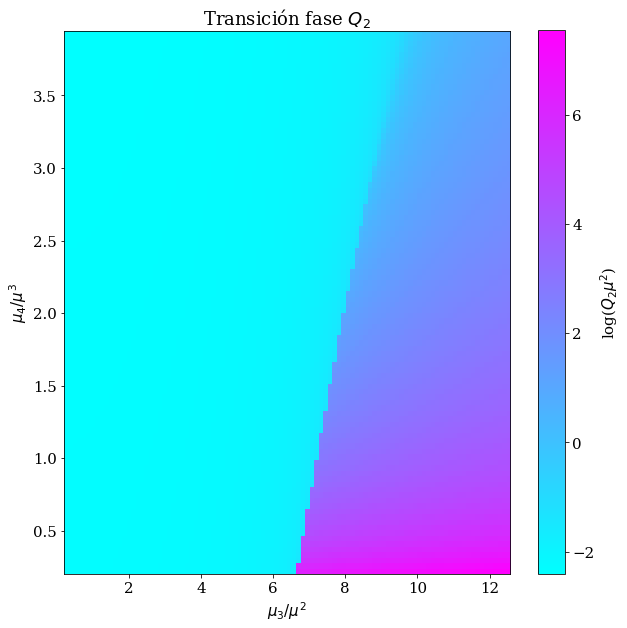

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

c = ax.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax.set_title("Transición fase $Q_2$")
ax.set_xlabel("$\mu_3/\mu^2$")
ax.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

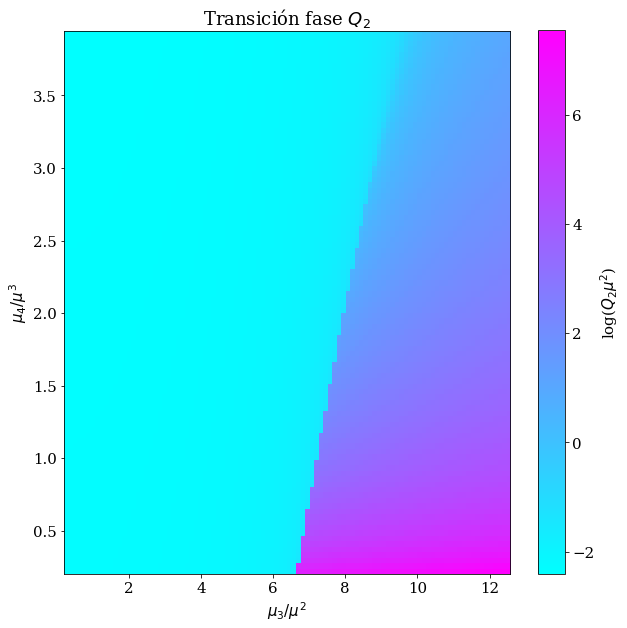

In [6]:
fig2, ax2 = plt.subplots(figsize=(10,10))

c = ax2.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax2.set_title("Transición fase $Q_2$")
ax2.set_xlabel("$\mu_3/\mu^2$")
ax2.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig2.colorbar(c, ax=ax2, label='log($Q_2\mu^2$)')

In [97]:
#mus_1 = (2, 3)
#bounds = [(-100, 100),(-100, 100)]
mus=(4,0.2)

cons1 = ({'type':'ineq', 'fun': g1},
        {'type':'ineq', 'fun': g2},
        {'type':'ineq', 'fun': g3},
        {'type':'ineq', 'fun': g4},
        {'type':'ineq', 'fun': g5},
        {'type':'ineq', 'fun': g6})

def Gamma(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    #print("Lambda1: ", lamb1,"Lambda2: ", lamb2,"Lambda3: ", lamb3, "mu3: ",mu3,"mu4: ",mu4)
    return np.real(1/2*(-8*lamb1 - lamb2 - lamb3) + 5*(5/2 + 1/4*(8*lamb1**2 + lamb2**2 + lamb3**2)) + 1/2*lamb1*(lamb2**2 - lamb3**2)*mu3 + (-(41/16) + 1/32*(32*lamb1**4 + lamb2**4 + lamb3**4 + 24*lamb1**2*(lamb2**2 + lamb3**2)))*mu4)

res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons1)

In [98]:
res

     fun: 11.476788939597547
    funl: array([11.47678894])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 2
   nlfev: 32
   nlhev: 0
   nljev: 7
 success: True
       x: array([0.20580237, 0.14985861, 0.29556401])
      xl: array([[0.20580237, 0.14985861, 0.29556401]])

In [99]:
#bnds = ((0, None), (0, None), (0, None))
cons = ({'type':'ineq', 'fun': g1},
        {'type':'ineq', 'fun': g2},
        {'type':'ineq', 'fun': g3},
        {'type':'ineq', 'fun': g4},
        {'type':'ineq', 'fun': g5},
        {'type':'ineq', 'fun': g6})


mu30 = 0.2
mu3f = 4*np.pi
#mu3f = 6
mu40 = 0.2
mu4f = 2*np.pi**2/5
#mu4f = 1
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))
bounds = [(-50,50), (-50,50),(-50,50)]

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        mus = (mu3list[x], mu4list[y])
        res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2 + 1/4*lamb3**2)

/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [127]:
bounds2 = [(0,25),(0,25),(10,25)]
res = shgo(Gamma, bounds=bounds2, args=(4,0.2), constraints=cons)
res

     fun: -643.0788640651608
    funl: array([-643.07886407])
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
   nlfev: 54
   nlhev: 0
   nljev: 12
 success: True
       x: array([5.02484385e+00, 1.65696285e-02, 2.00495358e+01])
      xl: array([[5.02484385e+00, 1.65696285e-02, 2.00495358e+01]])

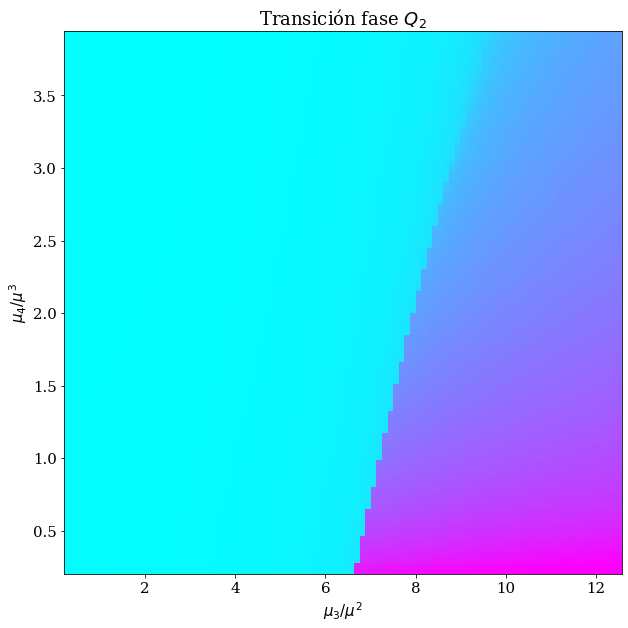

In [100]:
fig3, ax3 = plt.subplots(figsize=(10,10))

c = ax3.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax3.set_title("Transición fase $Q_2$")
ax3.set_xlabel("$\mu_3/\mu^2$")
ax3.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig3.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

## NO funciono lo anterior


In [74]:
from scipy.optimize import rosen, differential_evolution
bounds = [(0,2), (0, 2), (0, 2), (0, 2), (0, 2)]
result = differential_evolution(rosen, bounds, )
result.x, result.fun

(array([1., 1., 1., 1., 1.]), 0.0)

In [9]:
"""
from scipy.optimize import rosen, shgo

def f(x):  # (cattle-feed)
    return 24.55*x[0] + 26.75*x[1] + 39*x[2] + 40.50*x[3]

def g1(x):
    return 2.3*x[0] + 5.6*x[1] + 11.1*x[2] + 1.3*x[3] - 5  # >=0

def g2(x):
    return (12*x[0] + 11.9*x[1] +41.8*x[2] + 52.1*x[3] - 21
            - 1.645 * np.sqrt(0.28*x[0]**2 + 0.19*x[1]**2
                            + 20.5*x[2]**2 + 0.62*x[3]**2)
            ) # >=0

def h1(x):
    return x[0] + x[1] + x[2] + x[3] - 1  # == 0

cons = ({'type': 'ineq', 'fun': g1},
        {'type': 'ineq', 'fun': g2},
        {'type': 'eq', 'fun': h1})
bounds = [(0, 1.0),]*4
res = shgo(f, bounds, iters=3, constraints=cons)
"""

# Solver

In [120]:
from scipy.optimize import fsolve
from scipy import optimize

def eq123(lambs, *mus):
    mu3 = mus[0]
    mu4 = mus[1]
    lamb1 = lambs[0]
    lamb2 = lambs[1]
    lamb3 = lambs[2]
    D1 = -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4
    D2 = -(1/2) + (5*lamb2)/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4
    D3 = -(1/2) + (5*lamb3)/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4
    return [D1,D2,D3]

mus = (4,0.2)
root = optimize.root(eq123, [1, 1, 1], args=mus, tol=1e-11)
root

    fjac: array([[-0.92300651, -0.03066285,  0.38356064],
       [ 0.01052042, -0.99845819, -0.05450287],
       [-0.38464048,  0.04627129, -0.921906  ]])
     fun: array([5.10702591e-15, 7.88605292e-15, 5.55111512e-16])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([1.24013459e-11, 1.81133810e-11, 3.16097424e-12])
       r: array([-21.48427624,  -0.70301698,   7.17215203,  -5.15605004,
        -0.22425018,   2.46107507])
  status: 1
 success: True
       x: array([0.62810935, 0.0974463 , 2.20165849])

In [122]:
mu30 = 0.2
mu3f = 4*np.pi
#mu3f = 6
mu40 = 0.2
mu4f = 2*np.pi**2/5
#mu4f = 1
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))
#bounds = [(-50,50), (-50,50),(-50,50)]

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        mus = (mu3list[x], mu4list[y])
        root = optimize.root(eq123, [1, 1, 1], args=mus, tol=1e-11)
        #res = shgo(Gamma, bounds=bounds, args=mus, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = root.x[0]
        lamb2 = root.x[1]
        lamb3 = root.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2 + 1/4*lamb3**2)

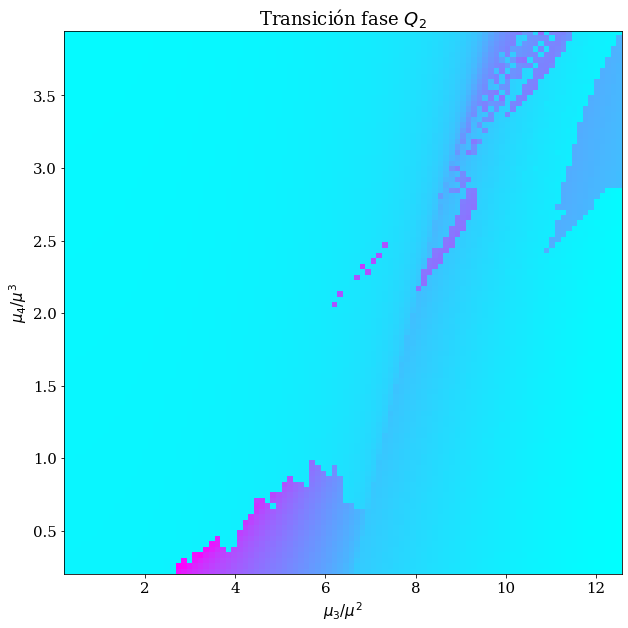

In [123]:
fig4, ax4 = plt.subplots(figsize=(10,10))

c = ax4.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax4.set_title("Transición fase $Q_2$")
ax4.set_xlabel("$\mu_3/\mu^2$")
ax4.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig4.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

In [121]:
eq123(root.x, *mus)

[5.10702591327572e-15, 7.886052921790565e-15, 5.551115123125783e-16]

In [118]:
eq123([5.02484385151935, 0.01657050307220192, 20.049535575611994], *mus)

[-7.855760486563668e-11, 1.9065332645951116e-11, -1.9838353182421997e-11]

# Minimize N=6

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import *
from scipy.optimize import fsolve
import math
from matplotlib.colors import LogNorm
from numpy import genfromtxt
import pandas as pd

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 15, "font.family": "serif"})

In [73]:
from scipy.optimize import rosen, shgo

def Gamma_N6(x,*mus3456):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    mu3 = mus3456[0]
    mu4 = mus3456[1]

    mu5 = mus3456[2]
    mu6 = mus3456[3]
 
    return (-27*lamb1)/2. - lamb2 - lamb3 - lamb4 - lamb5 + (5*(105 + 81*lamb1**2 + 4*(lamb2**2 + lamb2*lamb3 + lamb3**2 + lamb4**2 + lamb4*lamb5 + lamb5**2)))/12. + ((-2*lamb2**3 - 3*lamb2**2*lamb3 + 3*lamb2*lamb3**2 + 2*lamb3**3 - 2*lamb4**3 - 3*lamb4**2*lamb5 + 3*lamb4*lamb5**2 + 2*lamb5**3 + 27*lamb1*(lamb2**2 + lamb2*lamb3 + lamb3**2 - lamb4**2 - lamb4*lamb5 - lamb5**2))*mu3)/27. + (-22.09375 + (((9*lamb1)/2. + lamb2 - lamb3)**4 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**4 + ((9*lamb1)/2. - lamb4 + lamb5)**4 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (9*lamb1 + 4*lamb4 + 2*lamb5)**4/16.)/324.)*mu4 + ((((9*lamb1)/2. - 2*lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**5 + ((-9*lamb1)/2. + lamb4 - lamb5)**5 - ((9*lamb1)/2. + 2*lamb4 + lamb5)**5 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**5)*mu5)/1215. + (85.18229166666667 + (((9*lamb1)/2. + lamb2 - lamb3)**6 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**6 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**6 + ((9*lamb1)/2. - lamb4 + lamb5)**6 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**6 + (9*lamb1 + 4*lamb4 + 2*lamb5)**6/64.)/4374.)*mu6

In [74]:
def g1_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return lamb2 #>0

def g2_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return lamb3 #>0

def g3_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return lamb4 #>0

def g4_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return lamb5 #>0

def g5_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (lamb2 + lamb3) #>0

def g6_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 - 2*lamb2 - lamb3 - lamb4 - 2*lamb5) #>0

def g7_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 + lamb2 - lamb3 - lamb4 - 2*lamb5) #>0

def g8_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 + lamb2 + 2*lamb3 - lamb4 - 2*lamb5) #>0

def g9_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 - 2*lamb2 - lamb3 - lamb4 + lamb5) #>0

def g10_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 + lamb2 - lamb3 - lamb4 + lamb5) #>0

def g11_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 + lamb2 + 2*lamb3 - lamb4 + lamb5) #>0

def g12_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (lamb4 + lamb5) #>0

def g13_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 - 2*lamb2 - lamb3 + 2*lamb4 + lamb5) #>0

def g14_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 + lamb2 - lamb3 + 2*lamb4 + lamb5) #>0

def g15_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (9*lamb1 + lamb2 + 2*(lamb3 + lamb4) + lamb5) #>0


In [91]:
cons = ({'type':'ineq', 'fun': g1_N6},
        {'type':'ineq', 'fun': g2_N6},
        {'type':'ineq', 'fun': g3_N6},
        {'type':'ineq', 'fun': g4_N6},
        {'type':'ineq', 'fun': g5_N6},
        {'type':'ineq', 'fun': g6_N6},
        {'type':'ineq', 'fun': g7_N6},
        {'type':'ineq', 'fun': g8_N6},
        {'type':'ineq', 'fun': g9_N6},
        {'type':'ineq', 'fun': g10_N6},
        {'type':'ineq', 'fun': g11_N6},
        {'type':'ineq', 'fun': g12_N6},
        {'type':'ineq', 'fun': g13_N6},
        {'type':'ineq', 'fun': g14_N6},
        {'type':'ineq', 'fun': g15_N6})



In [85]:
bounds_test = [(-50, 50), (-50, 50),(-50, 50),(-50, 50),(-50, 50)]

mus3456_test = (1, 1, 10, 11)

res_test = shgo(Gamma_N6, bounds=bounds_test, args=mus3456_test, constraints=cons)

res_test.x

array([0.19206515, 0.15896325, 0.11135678, 0.28116917, 0.21710867])

In [87]:
bounds_test = [(-50, 50), (-50, 50),(-50, 50),(-50, 50),(-50, 50)]

mus3456_test = (1, 1, 1, 20)

res_test = shgo(Gamma_N6, bounds=bounds_test, args=mus3456_test, constraints=cons)

res_test.x

array([0.18121762, 0.17268045, 0.12718665, 0.1556669 , 0.2039823 ])

In [163]:
mu50 = 0.1
mu5f = 35

mu60 = 0.1
mu6f = 7

n = 10
mu5list = np.linspace(mu50, mu5f, n)
mu6list = np.linspace(mu60, mu6f, n)

def Q2_N6(x):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]
    return (81*lamb1**2 + 4*(lamb2**2 + lamb2*lamb3 + lamb3**2 + lamb4**2 + lamb4*lamb5 + lamb5**2))/12.

Q2_array_3 = np.zeros((n, n))
bounds = [(None, None), (None, None),(None, None),(None, None),(None, None)]

for y in range(len(mu6list)):
    print('Iteración ', y+1, "de ", len(mu6list),"con mu6= ",mu6list[y])
    for x in range(len(mu5list)):
        mus_xy = (60, 60, mu5list[x], mu6list[y])
        res_xy = shgo(Gamma_N6, bounds=bounds, args=mus_xy, constraints=cons)
        #res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        #lamb1 = res.x[0]
        #lamb2 = res.x[1]
        #lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array_3[(n-1) - y, x] = np.log(Q2_N6(res_xy.x))
        print(res_xy.x)

# Para N=6 con 100x100 puntos, se demoró 23 minutos


Iteración  1 de  10 con mu6=  0.1
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  2 de  10 con mu6=  0.8666666666666667
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  3 de  10 con mu6=  1.6333333333333335
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]

<ipython-input-163-6f179db1eb0a>:34: RuntimeWarning: divide by zero encountered in log
  Q2_array_3[(n-1) - y, x] = np.log(Q2_N6(res_xy.x))



[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  4 de  10 con mu6=  2.4000000000000004
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  5 de  10 con mu6=  3.166666666666667
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  6 de  10 con mu6=  3.9333333333333336
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  7 de  10 con mu6=  4.7
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Iteración  8 de  10 con mu6=  5.466666666666667
[0. 0.

In [ ]:
len(mu)

In [114]:
print(np.min(Q2_array_2),np.max(Q2_array_2))

-0.8022534048789411 11.258033215341438


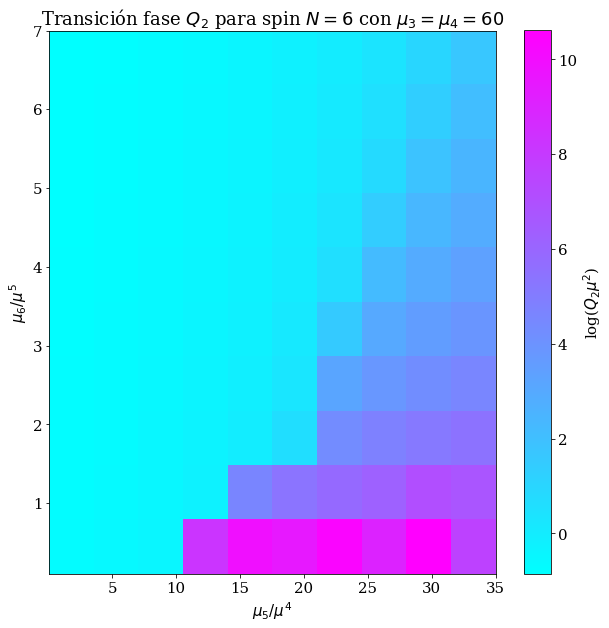

In [162]:
fig6, ax6 = plt.subplots(figsize=(10,10))

c = ax6.imshow(Q2_array_3, cmap ='cool', interpolation ='nearest', origin ='upper', extent =[mu50, mu5f, mu60, mu6f],aspect='auto')
ax6.set_title("Transición fase $Q_2$ para spin $N=6$ con $\mu_3=\mu_4=60$")
ax6.set_xlabel("$\mu_5/\mu^4$")
ax6.set_ylabel("$\mu_6/\mu^5$", rotation=90)

fig6.colorbar(c, ax=ax6, label='log($Q_2\mu^2$)')

In [127]:
#np.save('Q2_N6_200x200point.npy',Q2_array_2)

# Transición N=6

In [164]:
#from scipy.optimize import rosen, shgo

def Gamma2_N6(x, *mus345):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu6 = x[10]

    mu3 = mus345[0]
    mu4 = mus345[1]
    mu5 = mus345[2]
 
    return (-27*lamb1)/2. - lamb2 - lamb3 - lamb4 - lamb5 + (5*(105 + 81*lamb1**2 + 4*(lamb2**2 + lamb2*lamb3 + lamb3**2 + lamb4**2 + lamb4*lamb5 + lamb5**2)))/12. + ((-2*lamb2**3 - 3*lamb2**2*lamb3 + 3*lamb2*lamb3**2 + 2*lamb3**3 - 2*lamb4**3 - 3*lamb4**2*lamb5 + 3*lamb4*lamb5**2 + 2*lamb5**3 + 27*lamb1*(lamb2**2 + lamb2*lamb3 + lamb3**2 - lamb4**2 - lamb4*lamb5 - lamb5**2))*mu3)/27. + (-22.09375 + (((9*lamb1)/2. + lamb2 - lamb3)**4 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**4 + ((9*lamb1)/2. - lamb4 + lamb5)**4 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (9*lamb1 + 4*lamb4 + 2*lamb5)**4/16.)/324.)*mu4 + ((((9*lamb1)/2. - 2*lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**5 + ((-9*lamb1)/2. + lamb4 - lamb5)**5 - ((9*lamb1)/2. + 2*lamb4 + lamb5)**5 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**5)*mu5)/1215. + (85.18229166666667 + (((9*lamb1)/2. + lamb2 - lamb3)**6 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**6 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**6 + ((9*lamb1)/2. - lamb4 + lamb5)**6 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**6 + (9*lamb1 + 4*lamb4 + 2*lamb5)**6/64.)/4374.)*mu6

In [165]:
"""
SEGUNDAS DERIVADAS
"""

def f1_N6(x, *mus345):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu6 = x[10]

    mu3 = mus345[0]
    mu4 = mus345[1]
    mu5 = mus345[2]

    segunda_derivada1 = (67.5 + ((243*((9*lamb1)/2. + lamb2 - lamb3)**2 + 243*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 243*((9*lamb1)/2. + lamb2 + 2*lamb3)**2 + 243*((9*lamb1)/2. - lamb4 + lamb5)**2 + 243*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + (243*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)/4.)*mu4)/324. + ((405*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 405*((9*lamb1)/2. + lamb2 - lamb3)**3 + 405*((9*lamb1)/2. + lamb2 + 2*lamb3)**3 + 405*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 405*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 405*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + (((1215*((9*lamb1)/2. + lamb2 - lamb3)**4)/2. + (1215*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4)/2. + (1215*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)/2. + (1215*((9*lamb1)/2. - lamb4 + lamb5)**4)/2. + (1215*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4)/2. + (1215*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/32.)*mu6)/4374.)*v1 + ((2*lamb2 + lamb3)*mu3 + ((54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 108*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 54*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-180*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 270*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 135*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v2 + ((lamb2 + 2*lamb3)*mu3 + ((-54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 54*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 108*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-90*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 180*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 135*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 270*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v3 + ((-2*lamb4 - lamb5)*mu3 + ((-54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 54*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 180*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 90*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 135*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/8.)*mu6)/4374.)*v4 + ((-lamb4 - 2*lamb5)*mu3 + ((54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 108*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + (27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)/2.)*mu4)/324. + ((90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 90*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 180*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 270*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/16.)*mu6)/4374.)*v5

    return segunda_derivada1 #=0

def f2_N6(x, *mus345):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu6 = x[10]

    mu3 = mus345[0]
    mu4 = mus345[1]
    mu5 = mus345[2]

    segunda_derivada2 = ((2*lamb2 + lamb3)*mu3 + ((54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 108*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 54*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-180*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 270*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 135*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v1 + (3.3333333333333335 + ((54*lamb1 - 12*lamb2 - 6*lamb3)*mu3)/27. + ((12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 48*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 12*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((80*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 20*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 120*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 30*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v2 + (1.6666666666666667 + ((27*lamb1 - 6*lamb2 + 6*lamb3)*mu3)/27. + ((-12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 24*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 24*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((40*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 40*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 60*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 60*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v3

    return segunda_derivada2 #=0

def f3_N6(x, *mus345):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu6 = x[10]

    mu3 = mus345[0]
    mu4 = mus345[1]
    mu5 = mus345[2]

    segunda_derivada3 = ((lamb2 + 2*lamb3)*mu3 + ((-54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 54*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 108*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-90*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 180*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 135*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 270*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v1 + (1.6666666666666667 + ((27*lamb1 - 6*lamb2 + 6*lamb3)*mu3)/27. + ((-12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 24*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 24*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((40*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 40*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 60*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 60*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v2 + (3.3333333333333335 + ((54*lamb1 + 6*lamb2 + 12*lamb3)*mu3)/27. + ((12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 12*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 48*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((20*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 80*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 30*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 120*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v3

    return segunda_derivada3 #=0

def f4_N6(x, *mus345):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu6 = x[10]

    mu3 = mus345[0]
    mu4 = mus345[1]
    mu5 = mus345[2]

    segunda_derivada4 = ((-2*lamb4 - lamb5)*mu3 + ((-54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 54*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 180*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 90*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 135*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/8.)*mu6)/4374.)*v1 + (3.3333333333333335 + ((-54*lamb1 - 12*lamb4 - 6*lamb5)*mu3)/27. + ((12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 12*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 12*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 80*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 20*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 30*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/2.)*mu6)/4374.)*v4 + (1.6666666666666667 + ((-27*lamb1 - 6*lamb4 + 6*lamb5)*mu3)/27. + ((-12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 24*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 6*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 40*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 40*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 60*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/4.)*mu6)/4374.)*v5

    return segunda_derivada4 #=0

def f5_N6(x, *mus345):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu6 = x[10]

    mu3 = mus345[0]
    mu4 = mus345[1]
    mu5 = mus345[2]

    segunda_derivada5 = ((-lamb4 - 2*lamb5)*mu3 + ((54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 108*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + (27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)/2.)*mu4)/324. + ((90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 90*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 180*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 270*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/16.)*mu6)/4374.)*v1 + (1.6666666666666667 + ((-27*lamb1 - 6*lamb4 + 6*lamb5)*mu3)/27. + ((-12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 24*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 6*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 40*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 40*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 60*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/4.)*mu6)/4374.)*v4 + (3.3333333333333335 + ((-54*lamb1 + 6*lamb4 + 12*lamb5)*mu3)/27. + ((12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 48*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 3*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 20*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 80*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 120*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/8.)*mu6)/4374.)*v5

    return segunda_derivada5 #=0

def normalizacion_v(x):
    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    return v1**2 +v2**2 +v3**2 +v4**2 +v5**2 - 1 #=0



In [166]:
mus345_test = (60, 60, 20)

cons_2 = ({'type':'ineq', 'fun': g1_N6},
        {'type':'ineq', 'fun': g2_N6},
        {'type':'ineq', 'fun': g3_N6},
        {'type':'ineq', 'fun': g4_N6},
        {'type':'ineq', 'fun': g5_N6},
        {'type':'ineq', 'fun': g6_N6},
        {'type':'ineq', 'fun': g7_N6},
        {'type':'ineq', 'fun': g8_N6},
        {'type':'ineq', 'fun': g9_N6},
        {'type':'ineq', 'fun': g10_N6},
        {'type':'ineq', 'fun': g11_N6},
        {'type':'ineq', 'fun': g12_N6},
        {'type':'ineq', 'fun': g13_N6},
        {'type':'ineq', 'fun': g14_N6},
        {'type':'ineq', 'fun': g15_N6},
        {'type':'eq', 'fun': f1_N6,'args':mus345_test},
        {'type':'eq', 'fun': f2_N6,'args':mus345_test},
        {'type':'eq', 'fun': f3_N6,'args':mus345_test},
        {'type':'eq', 'fun': f4_N6,'args':mus345_test},
        {'type':'eq', 'fun': f5_N6,'args':mus345_test},
        {'type':'eq', 'fun': normalizacion_v})

bounds_test_2 = [(None, None),(None, None),(None, None),(None, None),(None, None),(None, None),(None, None),(None, None),(None, None),(None, None),(None, None)]

res_test = shgo(Gamma2_N6, bounds=bounds_test_2, args=mus345_test, constraints=cons_2)

res_test.x

<ipython-input-164-47432a5e4484>:22: RuntimeWarning: overflow encountered in double_scalars
  return (-27*lamb1)/2. - lamb2 - lamb3 - lamb4 - lamb5 + (5*(105 + 81*lamb1**2 + 4*(lamb2**2 + lamb2*lamb3 + lamb3**2 + lamb4**2 + lamb4*lamb5 + lamb5**2)))/12. + ((-2*lamb2**3 - 3*lamb2**2*lamb3 + 3*lamb2*lamb3**2 + 2*lamb3**3 - 2*lamb4**3 - 3*lamb4**2*lamb5 + 3*lamb4*lamb5**2 + 2*lamb5**3 + 27*lamb1*(lamb2**2 + lamb2*lamb3 + lamb3**2 - lamb4**2 - lamb4*lamb5 - lamb5**2))*mu3)/27. + (-22.09375 + (((9*lamb1)/2. + lamb2 - lamb3)**4 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**4 + ((9*lamb1)/2. - lamb4 + lamb5)**4 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (9*lamb1 + 4*lamb4 + 2*lamb5)**4/16.)/324.)*mu4 + ((((9*lamb1)/2. - 2*lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**5 + ((-9*lamb1)/2. + lamb4 - lamb5)**5 - ((9*lamb1)/2. + 2*lamb4 + lamb5)**5 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**5)*mu5)/1215. + (85.18229166666667 + (((9*la

array([ 1.e+50,  1.e+50,  1.e+50,  1.e+50,  1.e+50, -1.e+50, -1.e+50,
       -1.e+50, -1.e+50, -1.e+50, -1.e+50])

# Punto crítico N=6

In [ ]:
#from scipy.optimize import rosen, shgo
"""
Acción Gamma
"""

def Gamma3_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]
 
    return (-27*lamb1)/2. - lamb2 - lamb3 - lamb4 - lamb5 + (5*(105 + 81*lamb1**2 + 4*(lamb2**2 + lamb2*lamb3 + lamb3**2 + lamb4**2 + lamb4*lamb5 + lamb5**2)))/12. + ((-2*lamb2**3 - 3*lamb2**2*lamb3 + 3*lamb2*lamb3**2 + 2*lamb3**3 - 2*lamb4**3 - 3*lamb4**2*lamb5 + 3*lamb4*lamb5**2 + 2*lamb5**3 + 27*lamb1*(lamb2**2 + lamb2*lamb3 + lamb3**2 - lamb4**2 - lamb4*lamb5 - lamb5**2))*mu3)/27. + (-22.09375 + (((9*lamb1)/2. + lamb2 - lamb3)**4 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**4 + ((9*lamb1)/2. - lamb4 + lamb5)**4 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (9*lamb1 + 4*lamb4 + 2*lamb5)**4/16.)/324.)*mu4 + ((((9*lamb1)/2. - 2*lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 - lamb3)**5 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**5 + ((-9*lamb1)/2. + lamb4 - lamb5)**5 - ((9*lamb1)/2. + 2*lamb4 + lamb5)**5 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**5)*mu5)/1215. + (85.18229166666667 + (((9*lamb1)/2. + lamb2 - lamb3)**6 + ((-9*lamb1)/2. + 2*lamb2 + lamb3)**6 + ((9*lamb1)/2. + lamb2 + 2*lamb3)**6 + ((9*lamb1)/2. - lamb4 + lamb5)**6 + ((-9*lamb1)/2. + lamb4 + 2*lamb5)**6 + (9*lamb1 + 4*lamb4 + 2*lamb5)**6/64.)/4374.)*mu6

"""
SEGUNDAS DERIVADAS
"""

def f1_2_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]

    segunda_derivada1 = (67.5 + ((243*((9*lamb1)/2. + lamb2 - lamb3)**2 + 243*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 243*((9*lamb1)/2. + lamb2 + 2*lamb3)**2 + 243*((9*lamb1)/2. - lamb4 + lamb5)**2 + 243*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + (243*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)/4.)*mu4)/324. + ((405*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 405*((9*lamb1)/2. + lamb2 - lamb3)**3 + 405*((9*lamb1)/2. + lamb2 + 2*lamb3)**3 + 405*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 405*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 405*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + (((1215*((9*lamb1)/2. + lamb2 - lamb3)**4)/2. + (1215*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4)/2. + (1215*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)/2. + (1215*((9*lamb1)/2. - lamb4 + lamb5)**4)/2. + (1215*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4)/2. + (1215*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/32.)*mu6)/4374.)*v1 + ((2*lamb2 + lamb3)*mu3 + ((54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 108*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 54*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-180*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 270*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 135*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v2 + ((lamb2 + 2*lamb3)*mu3 + ((-54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 54*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 108*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-90*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 180*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 135*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 270*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v3 + ((-2*lamb4 - lamb5)*mu3 + ((-54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 54*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 180*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 90*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 135*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/8.)*mu6)/4374.)*v4 + ((-lamb4 - 2*lamb5)*mu3 + ((54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 108*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + (27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)/2.)*mu4)/324. + ((90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 90*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 180*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 270*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/16.)*mu6)/4374.)*v5

    return segunda_derivada1 #=0

def f2_2_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]

    segunda_derivada2 = ((2*lamb2 + lamb3)*mu3 + ((54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 108*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 54*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-180*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 90*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 270*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 135*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v1 + (3.3333333333333335 + ((54*lamb1 - 12*lamb2 - 6*lamb3)*mu3)/27. + ((12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 48*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 12*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((80*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 20*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 120*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 30*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v2 + (1.6666666666666667 + ((27*lamb1 - 6*lamb2 + 6*lamb3)*mu3)/27. + ((-12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 24*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 24*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((40*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 40*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 60*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 60*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v3

    return segunda_derivada2 #=0

def f3_2_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]

    segunda_derivada3 = ((lamb2 + 2*lamb3)*mu3 + ((-54*((9*lamb1)/2. + lamb2 - lamb3)**2 - 54*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 108*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((-90*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 90*((9*lamb1)/2. + lamb2 - lamb3)**3 + 180*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. + lamb2 - lamb3)**4 - 135*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 270*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v1 + (1.6666666666666667 + ((27*lamb1 - 6*lamb2 + 6*lamb3)*mu3)/27. + ((-12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 24*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 24*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((40*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 - 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 40*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 60*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 60*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v2 + (3.3333333333333335 + ((54*lamb1 + 6*lamb2 + 12*lamb3)*mu3)/27. + ((12*((9*lamb1)/2. + lamb2 - lamb3)**2 + 12*((-9*lamb1)/2. + 2*lamb2 + lamb3)**2 + 48*((9*lamb1)/2. + lamb2 + 2*lamb3)**2)*mu4)/324. + ((20*((9*lamb1)/2. - 2*lamb2 - lamb3)**3 + 20*((9*lamb1)/2. + lamb2 - lamb3)**3 + 80*((9*lamb1)/2. + lamb2 + 2*lamb3)**3)*mu5)/1215. + ((30*((9*lamb1)/2. + lamb2 - lamb3)**4 + 30*((-9*lamb1)/2. + 2*lamb2 + lamb3)**4 + 120*((9*lamb1)/2. + lamb2 + 2*lamb3)**4)*mu6)/4374.)*v3

    return segunda_derivada3 #=0

def f4_2_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]

    segunda_derivada4 = ((-2*lamb4 - lamb5)*mu3 + ((-54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 54*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 180*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 90*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 135*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/8.)*mu6)/4374.)*v1 + (3.3333333333333335 + ((-54*lamb1 - 12*lamb4 - 6*lamb5)*mu3)/27. + ((12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 12*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 12*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 80*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 20*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 30*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/2.)*mu6)/4374.)*v4 + (1.6666666666666667 + ((-27*lamb1 - 6*lamb4 + 6*lamb5)*mu3)/27. + ((-12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 24*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 6*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 40*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 40*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 60*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/4.)*mu6)/4374.)*v5

    return segunda_derivada4 #=0

def f5_2_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]

    segunda_derivada5 = ((-lamb4 - 2*lamb5)*mu3 + ((54*((9*lamb1)/2. - lamb4 + lamb5)**2 - 108*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + (27*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)/2.)*mu4)/324. + ((90*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 90*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 - 180*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((135*((9*lamb1)/2. - lamb4 + lamb5)**4 - 270*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (135*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/16.)*mu6)/4374.)*v1 + (1.6666666666666667 + ((-27*lamb1 - 6*lamb4 + 6*lamb5)*mu3)/27. + ((-12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 24*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 6*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((-20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 40*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 40*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((-30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 60*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/4.)*mu6)/4374.)*v4 + (3.3333333333333335 + ((-54*lamb1 + 6*lamb4 + 12*lamb5)*mu3)/27. + ((12*((9*lamb1)/2. - lamb4 + lamb5)**2 + 48*((-9*lamb1)/2. + lamb4 + 2*lamb5)**2 + 3*(9*lamb1 + 4*lamb4 + 2*lamb5)**2)*mu4)/324. + ((20*((-9*lamb1)/2. + lamb4 - lamb5)**3 - 20*((9*lamb1)/2. + 2*lamb4 + lamb5)**3 + 80*((-9*lamb1)/2. + lamb4 + 2*lamb5)**3)*mu5)/1215. + ((30*((9*lamb1)/2. - lamb4 + lamb5)**4 + 120*((-9*lamb1)/2. + lamb4 + 2*lamb5)**4 + (15*(9*lamb1 + 4*lamb4 + 2*lamb5)**4)/8.)*mu6)/4374.)*v5

    return segunda_derivada5 #=0

"""
Normalización de v
"""

def normalizacion_v_2(x):
    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    return v1**2 + v2**2 + v3**2 + v4**2 + v5**2 - 1 #=0

"""
Tercera derivada
"""

def h_N6(x, *mus34):
    lamb1 = x[0]
    lamb2 = x[1]
    lamb3 = x[2]
    lamb4 = x[3]
    lamb5 = x[4]

    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    v5 = x[9]

    mu5 = x[10]
    mu6 = x[11]

    mu3 = mus34[0]
    mu4 = mus34[1]

    tercera_derivada = 27*lamb3**2*mu5*v1**3 - 27*lamb4**2*mu5*v1**3 - 27*lamb4*lamb5*mu5*v1**3 - 27*lamb5**2*mu5*v1**3 + 15*lamb3**3*mu6*v1**3 + 15*lamb4**3*mu6*v1**3 + (45*lamb4**2*lamb5*mu6*v1**3)/2. - (45*lamb4*lamb5**2*mu6*v1**3)/2. - 15*lamb5**3*mu6*v1**3 + (27*lamb3*mu4*v1**2*v2)/2. + 9*lamb3**2*mu5*v1**2*v2 + 15*lamb3**3*mu6*v1**2*v2 + 6*mu3*v1*v2**2 - 3*lamb3*mu4*v1*v2**2 + 6*lamb3**2*mu5*v1*v2**2 + (10*lamb3**3*mu6*v1*v2**2)/9. - (4*mu3*v2**3)/9. + (2*lamb3*mu4*v2**3)/3. - (4*lamb3**2*mu5*v2**3)/27. + (100*lamb3**3*mu6*v2**3)/243. + 27*lamb3*mu4*v1**2*v3 + 18*lamb3**2*mu5*v1**2*v3 + 30*lamb3**3*mu6*v1**2*v3 + 6*mu3*v1*v2*v3 + 6*lamb3*mu4*v1*v2*v3 + 12*lamb3**2*mu5*v1*v2*v3 + (100*lamb3**3*mu6*v1*v2*v3)/9. - (2*mu3*v2**2*v3)/3. + 2*lamb3*mu4*v2**2*v3 + (4*lamb3**2*mu5*v2**2*v3)/9. + (140*lamb3**3*mu6*v2**2*v3)/81. + 6*mu3*v1*v3**2 + 6*lamb3*mu4*v1*v3**2 + 12*lamb3**2*mu5*v1*v3**2 + (100*lamb3**3*mu6*v1*v3**2)/9. + (2*mu3*v2*v3**2)/3. + 2*lamb3*mu4*v2*v3**2 + (20*lamb3**2*mu5*v2*v3**2)/9. + (220*lamb3**3*mu6*v2*v3**2)/81. + (4*mu3*v3**3)/9. + (4*lamb3*mu4*v3**3)/3. + (40*lamb3**2*mu5*v3**3)/27. + (440*lamb3**3*mu6*v3**3)/243. + (15*lamb1**3*mu6*(729*v1**3 - 4*(v2 - v3)*(2*v2 + v3)*(v2 + 2*v3) + 108*v1*(v2**2 + v2*v3 + v3**2)))/8. - (5*lamb2**3*mu6*(729*v1**3 - 729*v1**2*(2*v2 + v3) + 54*v1*(10*v2**2 + 10*v2*v3 + v3**2) - 4*(2*v2 + v3)*(11*v2**2 + 11*v2*v3 + 5*v3**2)))/243. + (3*lamb1**2*(4*mu5*(-((v2 - v3)*(2*v2 + v3)*(v2 + 2*v3)) + 27*v1*(v2**2 + v2*v3 + v3**2)) + 5*lamb2*mu6*(81*v1**2*(2*v2 + v3) + 18*v1*(-2*v2**2 - 2*v2*v3 + v3**2) + 4*(2*v2 + v3)*(v2**2 + v2*v3 + v3**2)) + 5*lamb3*mu6*(81*v1**2*(v2 + 2*v3) - 18*v1*(v2**2 - 2*v2*v3 - 2*v3**2) + 4*(v2 + 2*v3)*(v2**2 + v2*v3 + v3**2))))/4. + (lamb2**2*(6*mu5*(729*v1**3 - 243*v1**2*(2*v2 + v3) - 4*(2*v2 + v3)*(5*v2**2 + 5*v2*v3 - v3**2) + 162*v1*(2*v2**2 + 2*v2*v3 + v3**2)) + 5*lamb3*mu6*(-729*v1**3 + 1458*v1**2*(v2 + v3) - 108*v1*(5*v2**2 + 2*v2*v3 - v3**2) + 8*(11*v2**3 + 21*v2**2*v3 + 15*v2*v3**2 + 7*v3**3))))/162. + (lamb2*(27*mu4*(81*v1**2*(2*v2 + v3) + 18*v1*(-2*v2**2 - 2*v2*v3 + v3**2) + 4*(2*v2 + v3)*(v2**2 + v2*v3 + v3**2)) + 6*lamb3*mu5*(729*v1**3 + 486*v1**2*(-v2 + v3) + 324*v1*(v2 + v3)**2 - 8*(v2 - v3)*(5*v2**2 + 8*v2*v3 + 5*v3**2)) + 5*lamb3**2*mu6*(729*v1**3 + 1458*v1**2*(v2 + v3) - 108*v1*(v2**2 - 2*v2*v3 - 5*v3**2) + 8*(7*v2**3 + 15*v2**2*v3 + 21*v2*v3**2 + 11*v3**3))))/162. + (lamb1*(9*mu4*(729*v1**3 - 4*(v2 - v3)*(2*v2 + v3)*(v2 + 2*v3) + 108*v1*(v2**2 + v2*v3 + v3**2)) + 2*(3645*(lamb4**2 + lamb4*lamb5 + lamb5**2)*mu6*v1**3 + 18*lamb3*mu5*(81*v1**2*(v2 + 2*v3) - 18*v1*(v2**2 - 2*v2*v3 - 2*v3**2) + 4*(v2 + 2*v3)*(v2**2 + v2*v3 + v3**2)) + 5*lamb2**2*mu6*(729*v1**3 - 243*v1**2*(2*v2 + v3) - 4*(2*v2 + v3)*(5*v2**2 + 5*v2*v3 - v3**2) + 162*v1*(2*v2**2 + 2*v2*v3 + v3**2)) + 5*lamb3**2*mu6*(729*v1**3 + 243*v1**2*(v2 + 2*v3) - 4*(v2 + 2*v3)*(v2**2 - 5*v2*v3 - 5*v3**2) + 162*v1*(v2**2 + 2*v2*v3 + 2*v3**2)) + lamb2*(18*mu5*(81*v1**2*(2*v2 + v3) + 18*v1*(-2*v2**2 - 2*v2*v3 + v3**2) + 4*(2*v2 + v3)*(v2**2 + v2*v3 + v3**2)) + 5*lamb3*mu6*(729*v1**3 + 486*v1**2*(-v2 + v3) + 324*v1*(v2 + v3)**2 - 8*(v2 - v3)*(5*v2**2 + 8*v2*v3 + 5*v3**2))))))/36.

    return tercera_derivada

In [ ]:
cons_punto_critico = ({'type':'ineq', 'fun': g1_N6},
        {'type':'ineq', 'fun': g2_N6},
        {'type':'ineq', 'fun': g3_N6},
        {'type':'ineq', 'fun': g4_N6},
        {'type':'ineq', 'fun': g5_N6},
        {'type':'ineq', 'fun': g6_N6},
        {'type':'ineq', 'fun': g7_N6},
        {'type':'ineq', 'fun': g8_N6},
        {'type':'ineq', 'fun': g9_N6},
        {'type':'ineq', 'fun': g10_N6},
        {'type':'ineq', 'fun': g11_N6},
        {'type':'ineq', 'fun': g12_N6},
        {'type':'ineq', 'fun': g13_N6},
        {'type':'ineq', 'fun': g14_N6},
        {'type':'ineq', 'fun': g15_N6},
        {'type':'eq', 'fun': f1_2_N6,'args':mus345_test},
        {'type':'eq', 'fun': f2_2_N6},
        {'type':'eq', 'fun': f3_2_N6},
        {'type':'eq', 'fun': f4_2_N6},
        {'type':'eq', 'fun': f5_2_N6},
        {'type':'eq', 'fun': normalizacion_v_2},
        {'type':'eq', 'fun': h_N6})

bounds_test_2 = [(-50, 50), (-50, 50),(-50, 50),(-50, 50),(-50, 50),(None, None),(None, None),(None, None),(None, None),(None, None),(None, None)]

mus345_test = (60, 60, 20)

res_test = shgo(Gamma2_N6, bounds=bounds_test_2, args=mus345_test, constraints=cons_2)

res_test.x

In [146]:
def hola(x,*args):
    a = args[0]
    return x - a  #>0

argumento = (2,)

cons_prueba = ({'type':'ineq', 'fun': hola,'args':argumento})

def funcion_a_minimizar(x,*args):
    a = args[0]
    return (x-5)**4 - 10*a

bounds_prueba = [(0,100)]
res_prueba = shgo(funcion_a_minimizar,bounds=bounds_prueba, args=argumento, constraints=cons_prueba)

In [147]:
res_prueba.x

array([5.00258642])

In [141]:
argumento[0]

1